In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [6]:
tf.config.experimental.list_physical_devices()
tf.test.is_built_with_cuda()

False

In [48]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [52]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y_train[index][0]])
    plt.show()

def plot_prediction(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_test[index])
    plt.xlabel(classes[y_test[index][0]])
    plt.show()

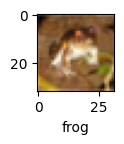

In [50]:
plot_sample(0)

In [26]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [33]:
# hot encode the labels
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=50)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.2999 - loss: 1.9326
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.4171 - loss: 1.6479
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4507 - loss: 1.5518
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.4766 - loss: 1.4916
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.4934 - loss: 1.4396
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.5095 - loss: 1.3910
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.5251 - loss: 1.3525
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.5396 - loss: 1.3182
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.5496 - loss: 1.2802
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.5617 - loss: 1.2469
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5738 - loss: 1.2223
Epoch 12

In [36]:
model.save('video_model.keras')

In [38]:
predictions = model.predict(x_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


4:deer != 3:cat
8:ship = 8:ship
8:ship = 8:ship
0:airplane = 0:airplane
4:deer != 6:frog
6:frog = 6:frog
1:automobile = 1:automobile
6:frog = 6:frog
3:cat = 3:cat
1:automobile = 1:automobile
0:airplane = 0:airplane
1:automobile != 9:truck
5:dog = 5:dog
7:horse = 7:horse
1:automobile != 9:truck
8:ship = 8:ship
3:cat != 5:dog
0:airplane != 7:horse
8:ship = 8:ship
6:frog = 6:frog


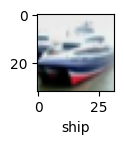

In [71]:
for i in range(20):
    argmax = np.argmax(predictions[i])
    print (f"{argmax}:{classes[argmax]} {'=' if argmax == y_test[i] else '!='} {y_test[i][0]}:{classes[y_test[i][0]]}")

plot_prediction(1)